In [51]:
#importing All Library which are we gone use in this Project

import numpy as np                 # For Numerical Operation
import pandas as pd                # For Data Handling
import matplotlib.pyplot as plt    
import seaborn as sns              # For Data Visulization
import warnings 
warnings.filterwarnings('ignore')
""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Algorithms Importing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [52]:
df=pd.read_csv('creditcard_2023.csv')

In [53]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [54]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Data Preprocessing

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [56]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [58]:
df=df.drop_duplicates()

# Data Visulization

Text(0.5, 1.0, 'Normal vs Fraud Transactions')

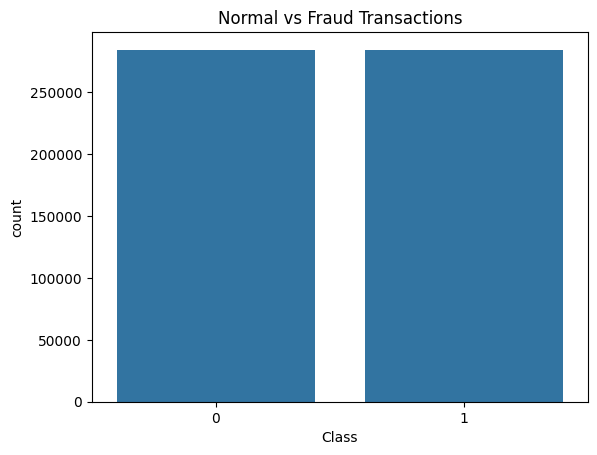

In [9]:
# Visulizing The Target Column By using CountPlot
sns.countplot(x='Class',data=df)
plt.title("Normal vs Fraud Transactions")

<Axes: xlabel='Amount', ylabel='Count'>

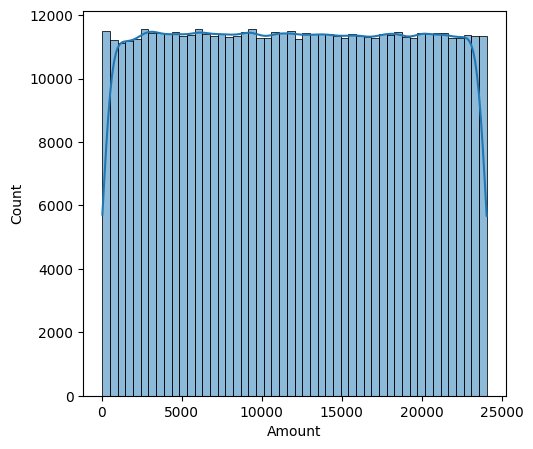

In [12]:
#To analyze when transactions occur and how much money is typically spent.

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Amount'],bins=50,kde=True)

<Axes: xlabel='id', ylabel='Count'>

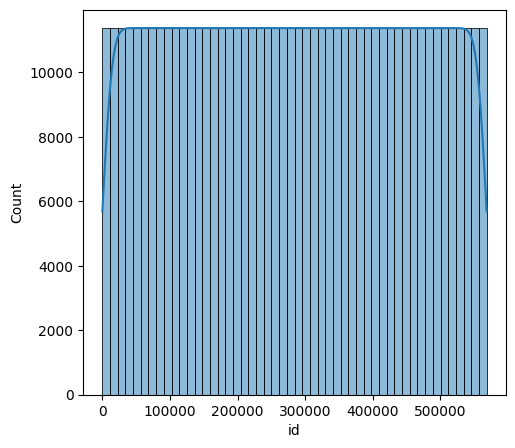

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['id'],bins=50,kde=True)


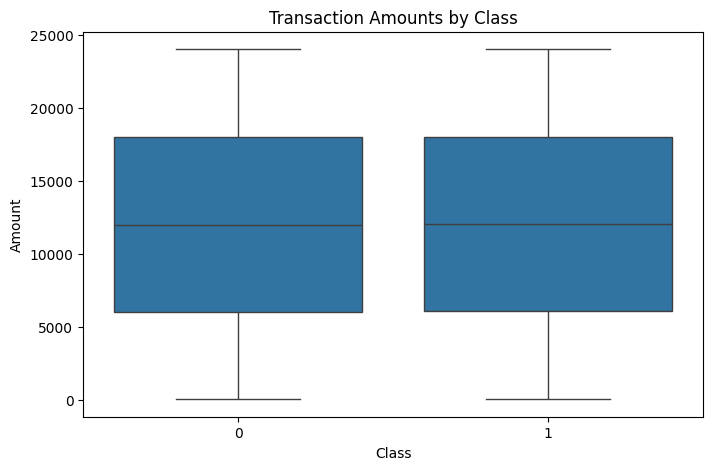

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amounts by Class")
plt.show()

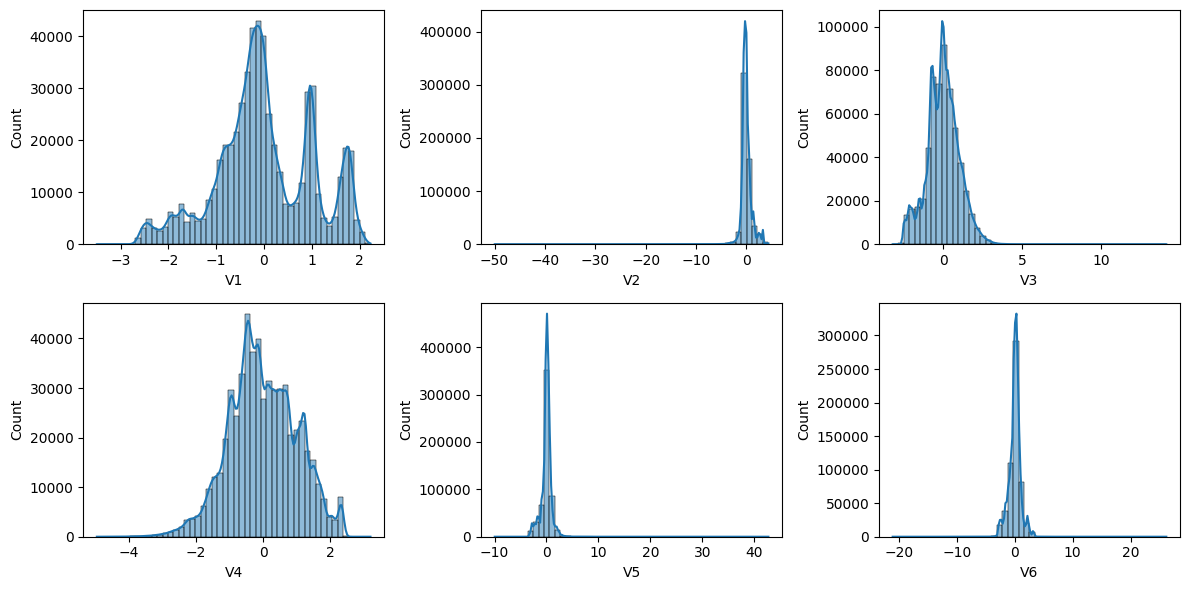

In [17]:
#To see the distribution (shape) of each feature.

plt.figure(figsize=(12,6))
for i in range(1, 7):  # show V1–V6 for example
    plt.subplot(2,3,i)
    sns.histplot(df[f'V{i}'], bins=50, kde=True)
plt.tight_layout()
plt.show()

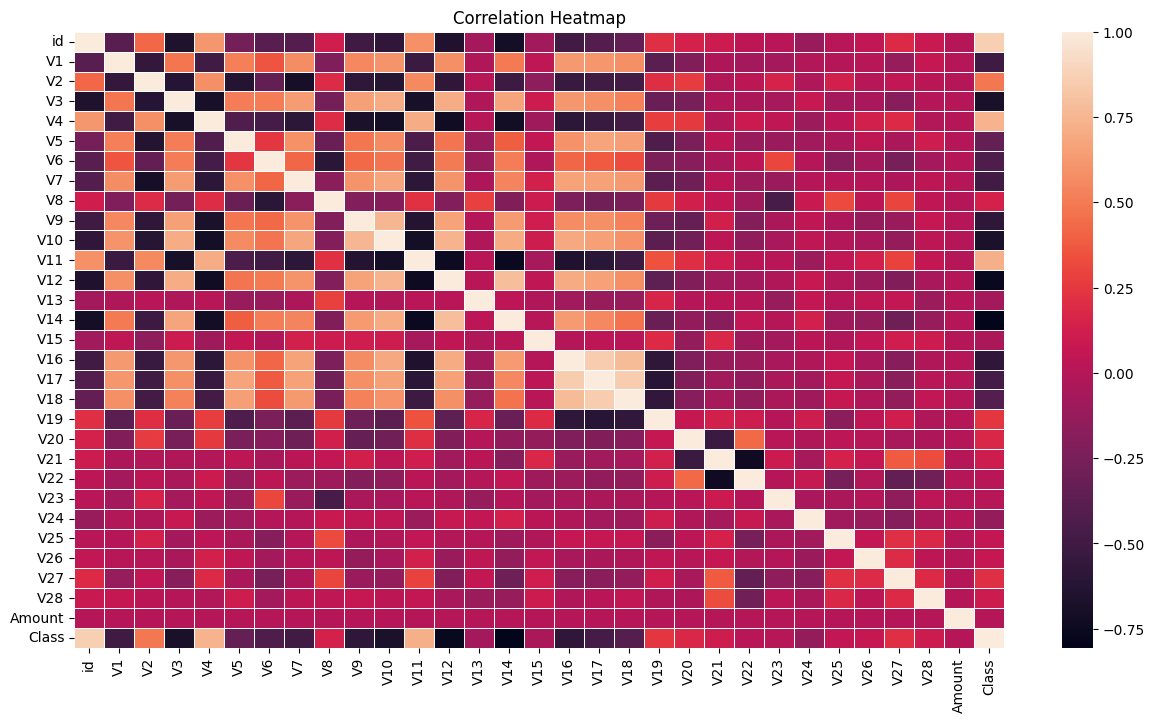

In [18]:
#To check relationships between features and find which ones are important

plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr,  linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

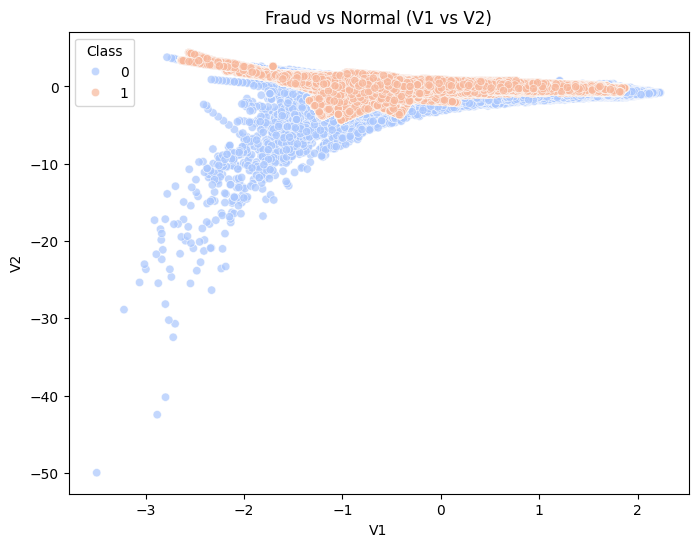

In [19]:
#To see if fraud and normal transactions can be visually separated in two PCA dimensions.


plt.figure(figsize=(8,6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=df, palette='coolwarm', alpha=0.7)
plt.title("Fraud vs Normal (V1 vs V2)")
plt.show()

# Data unbalance

In [59]:
class_counts = df['Class'].value_counts()


In [60]:
class_counts

Class
0    284315
1    284315
Name: count, dtype: int64

In [61]:
print(df['Class'].value_counts(normalize=True) * 100)

Class
0    50.0
1    50.0
Name: proportion, dtype: float64


# Feature Scaling

In [27]:
scaler= StandardScaler()
df[['id','Amount']] = scaler.fit_transform(df[['id','Amount']])

In [62]:
#Spiliting Data into Feature and Target Column format
X=df.drop(columns='Class',axis=1)
y=df['Class']




In [63]:
# Spiliting data Using Train Test Spilit
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [73]:
#from imblearn.over_sampling import SMOTE

In [74]:
#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [87]:
#print(pd.Series(y_train_res).value_counts())

Class
0    189770
1    189770
Name: count, dtype: int64


Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


# Model Building

In [64]:
# Store all model into A Dictionary
models={'Logestic_regression': LogisticRegression(max_iter=1000,random_state=42),
       #'Random_Forest': RandomForestClassifier(n_estimators=100,random_state=42),
       'XGBoost':XGBClassifier(
            n_estimators=200,
           learning_rate=0.1,
           max_depth=5,
           subsample=0.8,
           colsample_bytree=0.8,
           random_state=42,
           use_label_encoder=False,
           eval_metrices='loglss'
       )}


In [65]:
# --- Train and evaluate all models ---
results = {}

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"✅ {name} Accuracy:",acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)



🚀 Training Logestic_regression...
✅ Logestic_regression Accuracy: 0.789680678717599
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76     93775
           1       0.73      0.92      0.81     93873

    accuracy                           0.79    187648
   macro avg       0.81      0.79      0.79    187648
weighted avg       0.81      0.79      0.79    187648

------------------------------------------------------------

🚀 Training XGBoost...
✅ XGBoost Accuracy: 0.9997974931787176
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93775
           1       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648

------------------------------------------------------------


In [66]:
# --- Find Best Model ---
best_model = max(results, key=results.get)
print("Best Model:", best_model)
print("Best Accuracy:", results[best_model])

Best Model: XGBoost
Best Accuracy: 0.9997974931787176


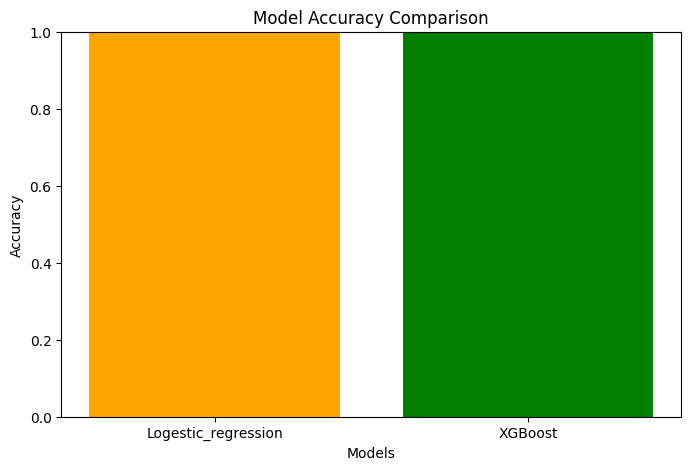

In [47]:
# --- Plot Accuracy Comparison ---
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['orange','green','blue','red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [48]:
import joblib

# Assuming your trained XGBoost model is 'model'
joblib.dump(model, "xgb_fraud_model.pkl")



['xgb_fraud_model.pkl']

In [72]:
# ----------------- Test Input Data -----------------

# Example transaction (replace values with the one you want to test)
test_data = [[1, -2.2, 1.9, -1.5, 2.1, -0.8, 2.6, -1.1, 0.3,
     1.4, -2.0, 0.6, -1.3, 2.2, -0.9, 1.5, -0.7,
     2.8, -1.6, 0.4, 1.2, -0.3, 0.9, -1.0, 2.0,
     -0.5, 4.5, -3.2, 0.0, 1200.0]]


# Column names
columns = ['id'] + [f'V{i}' for i in range(1,29)] + ['Amount']

# Create DataFrame
input_df = pd.DataFrame(test_data, columns=columns)

# ----------------- Make Predictions for all models -----------------
for name, model in models.items():
    prediction = model.predict(input_df)[0]
    result = "Normal ✅" if prediction == 0 else "Fraudulent ⚠️"
    print(f"{name} prediction: {result}")


Logestic_regression prediction: Normal ✅
XGBoost prediction: Fraudulent ⚠️
